In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model
import statsmodels.api as sm
plt.rc("font", size=14)
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
raw = pd.read_excel('car-counts.xlsx')
raw['imaging_ts']=pd.to_datetime(raw['imaging_ts'])
raw['day']=raw['imaging_ts'].dt.dayofweek #Create a "day of the week" column from timestamp. 0=Monday, 6=Sunday
#initially planned to make an "hour/time of day" column and found that images were all taken around the same time.
print(raw.shape)
print(raw.columns)
print(raw.dtypes)

(51, 5)
Index(['imaging_ts', 'tile_id', 'cloud_score', 'objects detected', 'day'], dtype='object')
imaging_ts          datetime64[ns]
tile_id                     object
cloud_score                float64
objects detected             int64
day                          int64
dtype: object


In [4]:
raw['tile_id'].unique()
## group by day - data dict said that daily counts should be summed
grouped = raw.groupby(['imaging_ts','day'], as_index=False)['objects detected'].sum()
print(grouped.dtypes)
# want to add cloud_score back into dataset
# should I take average of cloud score per day?
grouped = grouped.merge(raw[['cloud_score','imaging_ts']], 
                        left_on = 'imaging_ts', right_on = 'imaging_ts')
grouped = grouped.groupby(['imaging_ts','day','objects detected'], as_index=False)['cloud_score'].mean()
grouped['month']=grouped['imaging_ts'].dt.month
grouped['year']=grouped['imaging_ts'].dt.year

imaging_ts          datetime64[ns]
day                          int64
objects detected             int64
dtype: object


### Exploring and/or Cleaning Data

In [14]:
# Summary statistics for # of Objects Detected and Cloud Score
grouped[['objects detected']].describe()
print(170-109)

61


In [6]:
# Objects detected by day
grouped.groupby(['day'])['objects detected'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
0,2.0,257.000,114.551299,176.0,216.50,257.0,297.50,338.0
1,5.0,257.600,77.105772,138.0,249.00,252.0,310.00,339.0
2,1.0,199.000,NaN,199.0,199.00,199.0,199.00,199.0
3,5.0,242.000,125.894797,18.0,278.00,296.0,305.00,313.0
4,2.0,146.000,189.504617,12.0,79.00,146.0,213.00,280.0
5,8.0,106.625,30.420564,61.0,86.75,106.5,127.50,152.0
6,4.0,60.500,48.514603,16.0,21.25,56.0,95.25,114.0


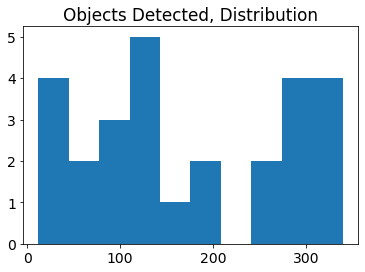

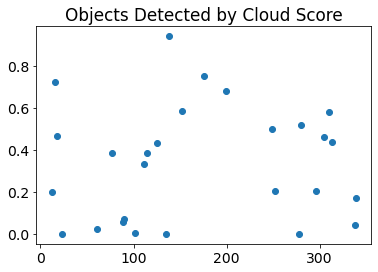

KeyError: 'logobs'

In [13]:
#show general distribution of objects detected
grouped['objects detected'].hist(bins=10,grid=False)
plt.title("Objects Detected, Distribution")
plt.show()
# note to self - less of a normal distribution than expected
graph2 = plt.scatter(grouped['objects detected'],grouped['cloud_score'])
plt.title("Objects Detected by Cloud Score")
plt.show()
plt.scatter(grouped['logobs'],filtered['cloud_score'])
plt.title("Log Objects Detected by Cloud Score")
plt.show()
plt.scatter(grouped['objects detected'],filtered['logcloud'])
plt.title("Objects Detected by log-based2 Cloud Score")
plt.show()
plt.scatter(grouped['objects detected'],filtered['sqrtcloud'])
plt.title("Objects Detected by Square Root Cloud Score")
plt.show()
plt.scatter(grouped['objects detected'],filtered['sqcloud'])
plt.title("Objects Detected by Square Cloud Score")
plt.show()

In [8]:
Y = grouped['objects detected']
X = grouped[['cloud_score','day','month']]

regress = linear_model.LinearRegression()
regress.fit(X, Y)

print('Intercept: \n', regress.intercept_)
print('Coefficients: \n', regress.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

NameError: name 'filtered' is not defined

In [9]:
Y = grouped['logobs']
X = grouped[['cloud_score','day','month']]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

NameError: name 'filtered' is not defined

In [10]:
Y = grouped['objects detected']
X = grouped[['logcloud','day','month']]

regress = linear_model.LinearRegression()
regress.fit(X, Y)

print('Intercept: \n', regress.intercept_)
print('Coefficients: \n', regress.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

NameError: name 'filtered' is not defined

In [12]:
Y = grouped['objects detected']
X = grouped[['sqcloud','day','month']]

regress = linear_model.LinearRegression()
regress.fit(X, Y)

print('Intercept: \n', regress.intercept_)
print('Coefficients: \n', regress.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

NameError: name 'filtered' is not defined